Bootstrap Method:
1, select sample : randomly select samples from large dataset one at a time with replecement until reaching the chosen sample size. 
2, For each bootstrap sample, fit a model on the data sample
3, Calulate the model accuracy score on out-of-bag observations. 
4, run repeatitions, calcuate the mean of model skill scores. 
For estimating a quantity of a population. 

In [90]:
import numpy as np 
import pandas as pd
from sklearn.utils import resample 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt 

In [91]:
print(sklearn.__version__)

0.21.2


In [92]:
data = pd.read_csv('AdmissionDataUCLA.csv')
# data = pd.read_csv('pima-indians-diabetes.data.csv', header = None)
data.head(3)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1


In [93]:
values = data.values # convert data from dataframe to ndarray 

In [97]:
# configure bootstrap two figures
n_size = int(len(data)*0.70) # sample size
n_iter = 1200 # num of repetitions

In [98]:
# run bootstrap
stats = []
for i in range(n_iter): 
    # choose n_size of bootstrap samples as training dataset
    train_data = resample(values, n_samples = n_size) # with replacement
    
    test_data = np.array([x for x in values if x.tolist() not in train_data.tolist()])
    # fit decsion tree model 
    model = DecisionTreeClassifier()
    model.fit(train_data[:, 1:], train_data[:,0]) # 1st col is targe col.
    predictions = model.predict(test_data[:,1:]) # model predictions
    score = accuracy_score(test_data[:,0], predictions) #
    stats.append(score)

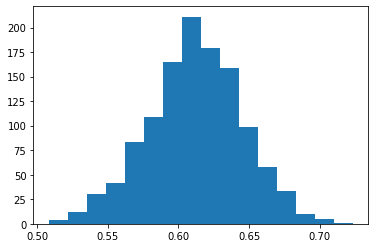

95.0 confidence interval 54.3% and 67.5%


In [99]:
# plot score distribution , expect gaussian distribution, perhaps with a skew
plt.hist(stats, bins = 16)
plt.show()

#calculate 95% confidence interval 
alpha = 0.95
p_l = ((1.0-alpha)/2.0)*100  # 0.025
p_u = (alpha+ ((1.0-alpha)/2.0))*100  # 0.975
l_bound = max(0.0, np.percentile(stats, p_l))
u_bound = min(1.0, np.percentile(stats, p_u))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, l_bound*100, u_bound*100))
    

ref: 
    https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/